In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
df_credit_card = pd.read_csv("Credit_card.csv")

In [ ]:
df_label = pd.read_csv("Credit_card_label.csv")

In [ ]:
df = pd.merge(df_credit_card, df_label, on='Ind_ID', how='inner')

In [ ]:
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [ ]:
df.nunique()

Ind_ID             1548
GENDER                2
Car_Owner             2
Propert_Owner         2
CHILDREN              6
Annual_income       115
Type_Income           4
EDUCATION             5
Marital_status        5
Housing_type          6
Birthday_count     1270
Employed_days       956
Mobile_phone          1
Work_Phone            2
Phone                 2
EMAIL_ID              2
Type_Occupation      18
Family_Members        7
label                 2
dtype: int64

In [ ]:
df.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [ ]:
df["GENDER"] = df["GENDER"].replace("M",1)
df["GENDER"] = df["GENDER"].replace("F",0)

In [ ]:
df["Car_Owner"] = df["Car_Owner"].replace("Y",1)
df["Car_Owner"] = df["Car_Owner"].replace("N",0)

In [ ]:
df["Propert_Owner"] = df["Propert_Owner"].replace("Y",1)
df["Propert_Owner"] = df["Propert_Owner"].replace("N",0)

In [ ]:
df.drop(["Ind_ID", "Mobile_phone", "Work_Phone", "Phone", "EMAIL_ID", "Type_Occupation"], axis=1, inplace=True)

In [ ]:
df.rename(columns = {"Birthday_count" : "Age", "Employed_days" : "Experience"}, inplace=True) 

In [ ]:
df["Age"] = round(abs(df["Age"]/365))
df["Experience"] = round(abs(df["Experience"]/365),1)

In [ ]:
for i in df.columns:
  print(df[i].value_counts())
  print("-------------------")

0.0    973
1.0    568
Name: GENDER, dtype: int64
-------------------
0    924
1    624
Name: Car_Owner, dtype: int64
-------------------
1    1010
0     538
Name: Propert_Owner, dtype: int64
-------------------
0     1091
1      305
2      134
3       16
4        1
14       1
Name: CHILDREN, dtype: int64
-------------------
135000.0    170
112500.0    144
180000.0    137
157500.0    125
225000.0    119
           ... 
119700.0      1
69372.0       1
37800.0       1
333000.0      1
69750.0       1
Name: Annual_income, Length: 115, dtype: int64
-------------------
Working                 798
Commercial associate    365
Pensioner               269
State servant           116
Name: Type_Income, dtype: int64
-------------------
Secondary / secondary special    1031
Higher education                  426
Incomplete higher                  68
Lower secondary                    21
Academic degree                     2
Name: EDUCATION, dtype: int64
-------------------
Married                 104

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(1380, 13)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(1328, 13)

In [ ]:
df.head()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Age,Experience,Family_Members,label
0,1.0,1,1,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.0,1000.7,2,1
1,0.0,1,0,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,1.6,2,1
7,0.0,0,0,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,61.0,1000.7,2,1
8,1.0,1,1,1,450000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,50.0,1.9,3,1
9,1.0,1,1,1,450000.0,Pensioner,Secondary / secondary special,Married,House / apartment,50.0,1.9,3,1


<AxesSubplot:xlabel='Annual_income', ylabel='Count'>

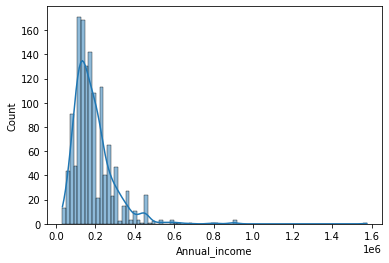

In [ ]:
sns.histplot(df["Annual_income"], kde = True)

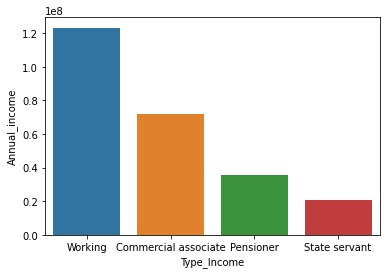

In [ ]:
cat = df[["Type_Income", "Annual_income"]].groupby(['Type_Income'], as_index=False).sum().sort_values(by='Annual_income', ascending=False)
sns.barplot(x = "Type_Income", y = "Annual_income", data = cat)
plt.show()

<AxesSubplot:xlabel='Family_Members', ylabel='Annual_income'>

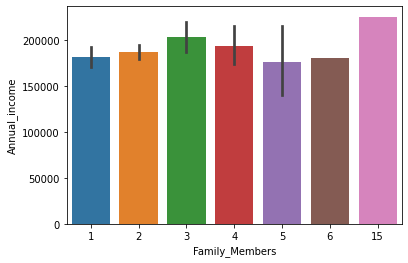

In [ ]:
sns.barplot(x = "Family_Members", y = "Annual_income", data = df)

<AxesSubplot:xlabel='Age', ylabel='Annual_income'>

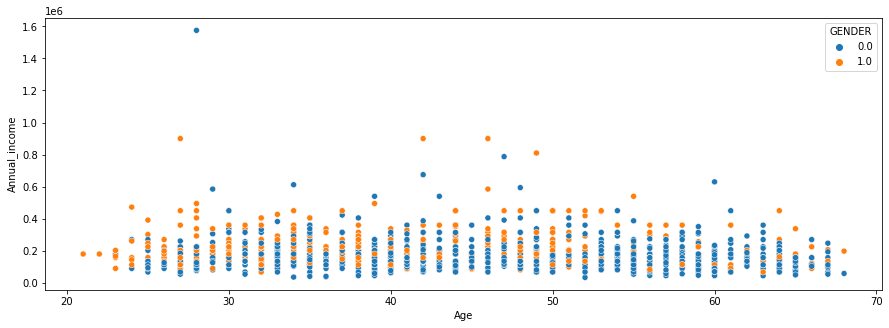

In [ ]:
plt.figure(figsize=(15,5))
sns.scatterplot(x = df["Age"], y = df["Annual_income"], hue = df["GENDER"])

<AxesSubplot:xlabel='Age', ylabel='Family_Members'>

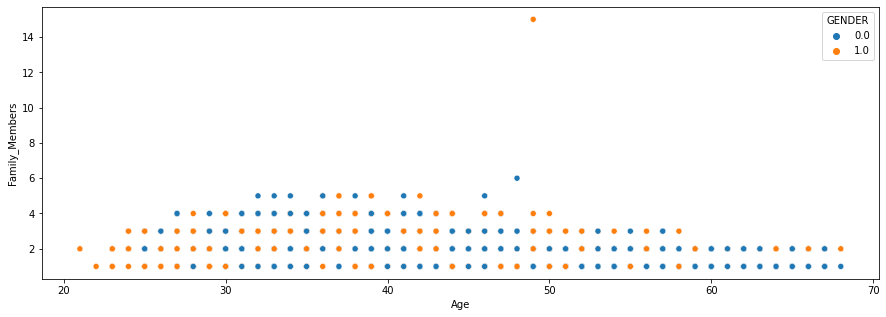

In [ ]:
plt.figure(figsize=(15,5))
sns.scatterplot(x = df["Age"], y = df["Family_Members"], hue = df["GENDER"])

<AxesSubplot:xlabel='Age', ylabel='CHILDREN'>

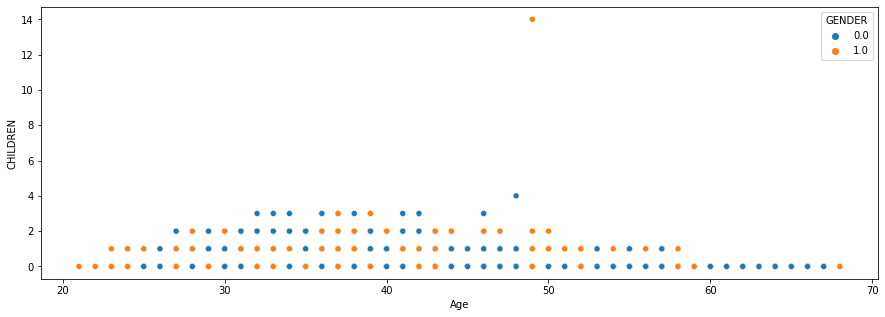

In [ ]:
plt.figure(figsize=(15,5))
sns.scatterplot(x = df["Age"], y = df["CHILDREN"], hue = df["GENDER"])

<AxesSubplot:xlabel='Annual_income', ylabel='Experience'>

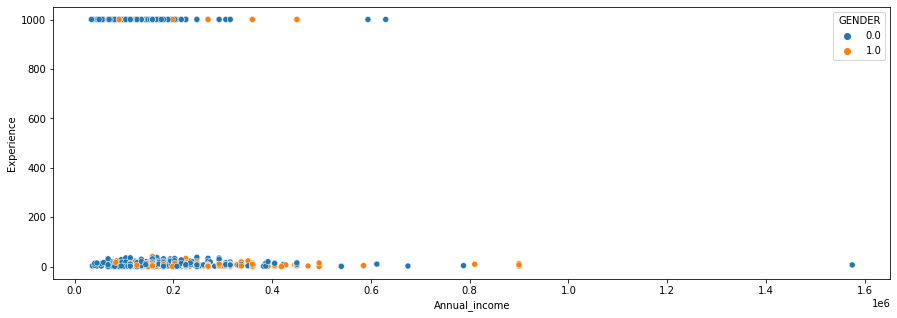

In [ ]:
plt.figure(figsize=(15,5))
sns.scatterplot(x = df["Annual_income"], y = df["Experience"], hue = df["GENDER"])

In [ ]:
df["GENDER"].unique()

array([1., 0.])

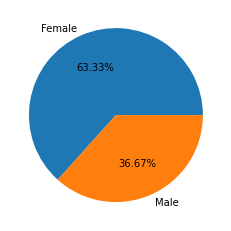

In [ ]:
plt.pie(df["GENDER"].value_counts(), labels=["Female", "Male"], autopct='%1.2f%%')
plt.show()

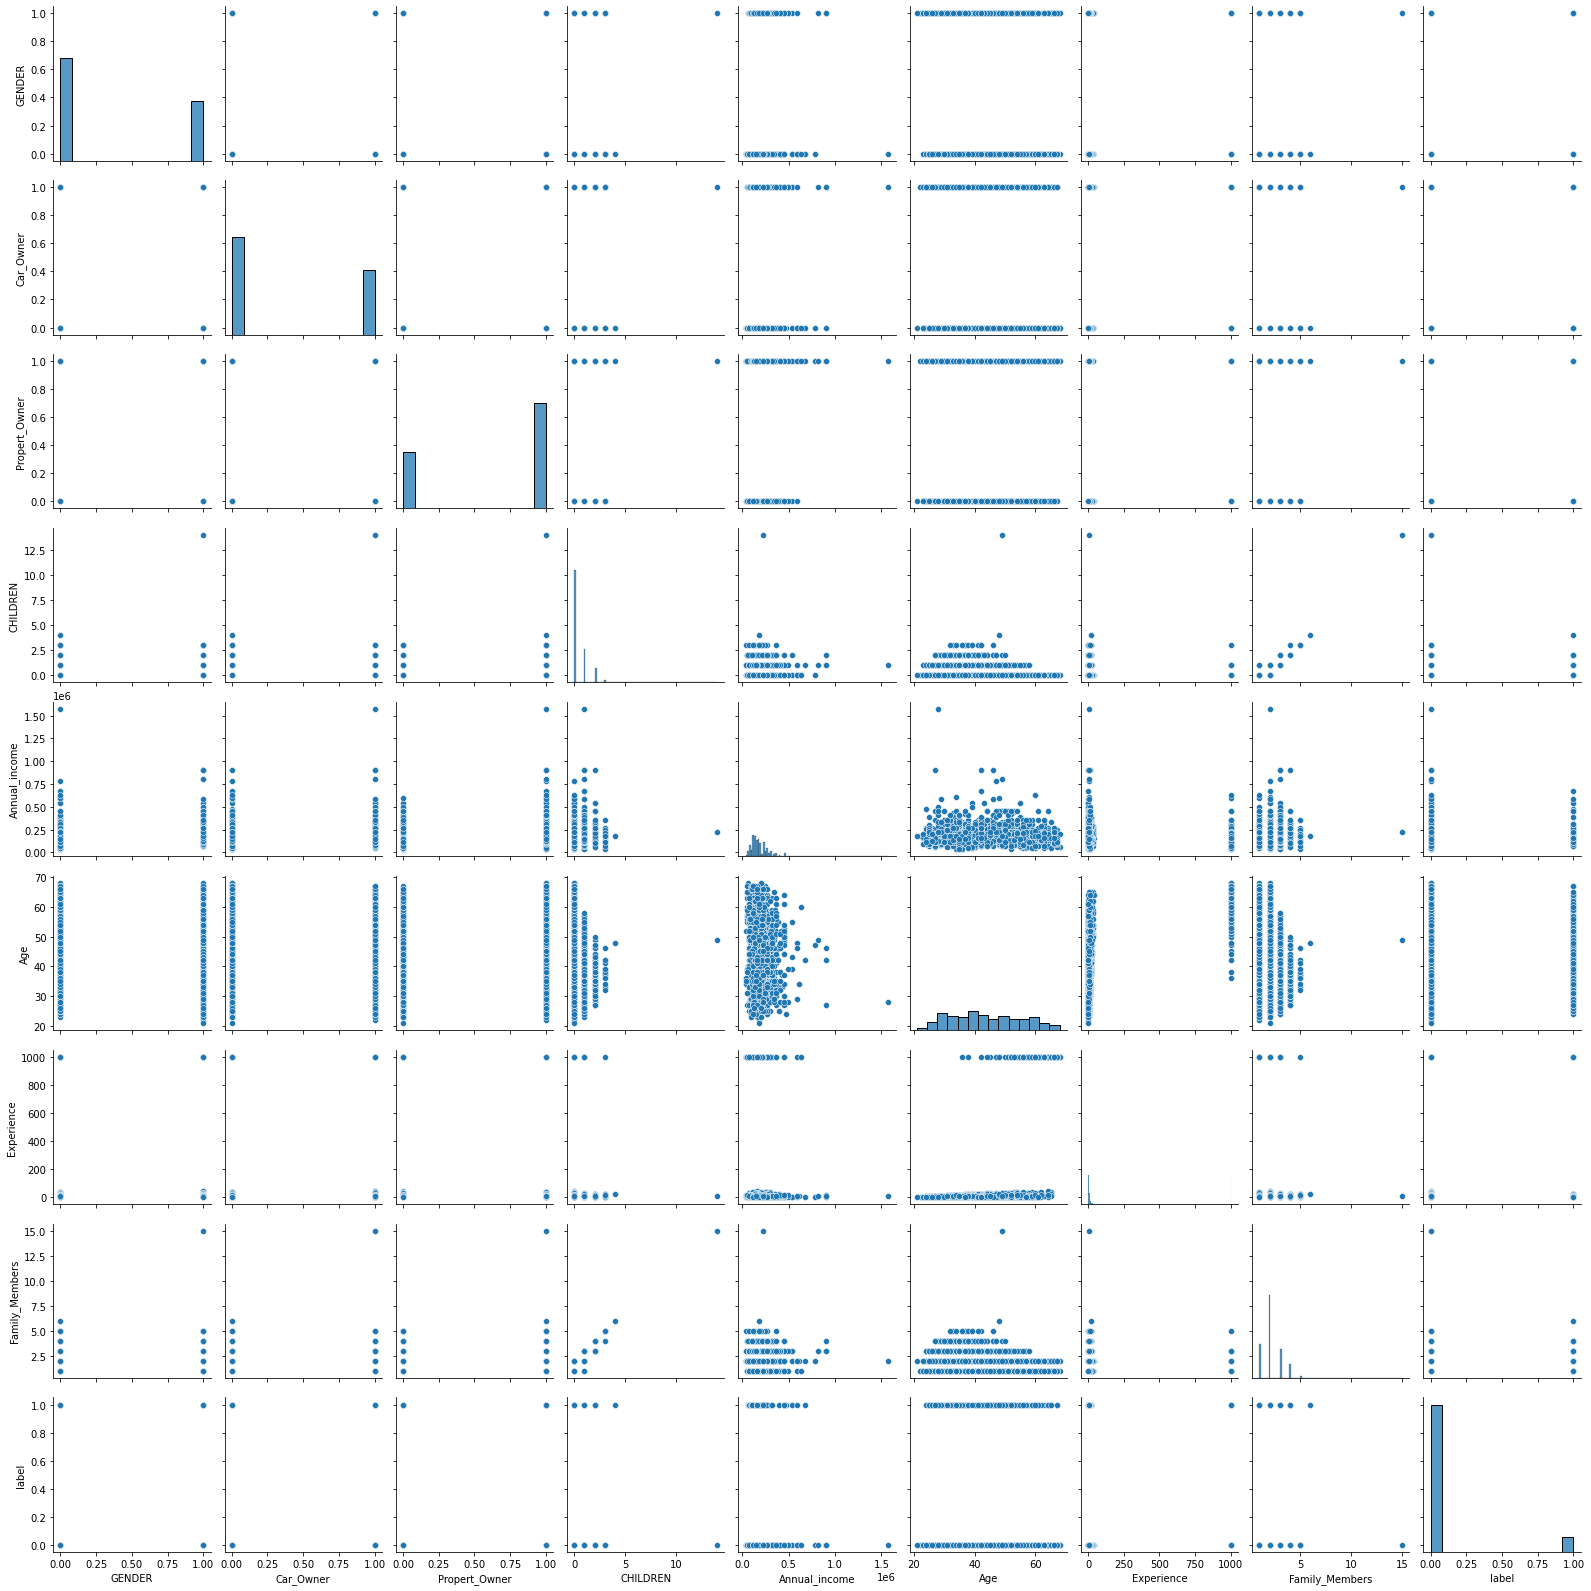

In [ ]:
sns.pairplot(df)

In [ ]:
iqr_age = 53-33
upper_age = 53 + (1.5*iqr_age)
inner_age = 33 - (1.5*iqr_age)
df.drop(df[(df["Age"]>upper_age)].index, inplace=True)
df.drop(df[(df["Age"]<inner_age)].index, inplace=True)

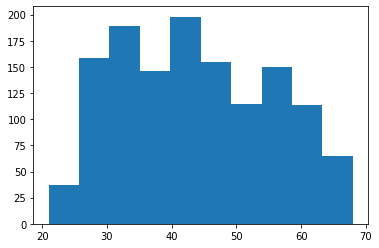

In [ ]:
plt.hist(df["Age"])
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


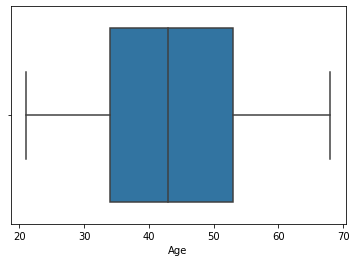

In [ ]:
sns.boxplot(df["Age"])
plt.show()

In [ ]:
df.describe()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Age,Experience,Family_Members,label
count,1328.000000,1328.000000,1328.000000,1328.000000,1.328000e+03,1328.000000,1328.000000,1328.000000,1328.000000
mean,0.366717,0.396084,0.649849,0.429970,1.890129e+05,43.846386,173.362801,2.182229,0.091114
std,0.482090,0.489267,0.477197,0.799155,1.067966e+05,11.516793,370.852828,0.966625,0.287880
min,0.000000,0.000000,0.000000,0.000000,3.375000e+04,21.000000,0.200000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.215000e+05,34.000000,3.200000,2.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,1.620000e+05,43.000000,6.800000,2.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,2.250000e+05,53.000000,16.100000,3.000000,0.000000
max,1.000000,1.000000,1.000000,14.000000,1.575000e+06,68.000000,1000.700000,15.000000,1.000000


In [ ]:
iqr_child = 1-0
upper_child = 1 + (1.5*iqr_child)
lower_child = 0 - (1.5*iqr_child)
df.drop(df[(df["CHILDREN"]>upper_child)].index, inplace=True)
df.drop(df[(df["CHILDREN"]<lower_child)].index, inplace=True)

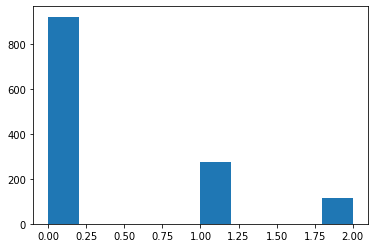

In [ ]:
plt.hist(df["CHILDREN"])
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


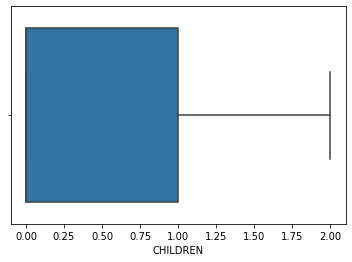

In [ ]:
sns.boxplot(df["CHILDREN"])
plt.show()

In [ ]:
iqr_fam = 3-2
upper_fam_member = 3 + (1.5*1)
lower_fam_member = 2 - (1.5*1)
df.drop(df[(df["Family_Members"]>upper_fam_member)].index, inplace=True)

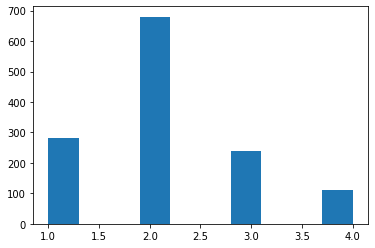

In [ ]:
plt.hist(df["Family_Members"])
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


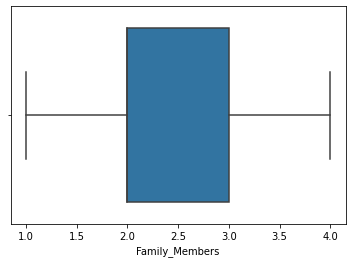

In [ ]:
sns.boxplot(df["Family_Members"])
plt.show()

In [ ]:
iqr_exp = 16.1-3.2
upper_exp = 16.1 + (1.5*iqr_exp)
lower_exp = 3.2 - (1.5*iqr_exp)
print(upper_exp)
df.drop(df[df["Experience"]>upper_exp].index, inplace=True)

35.45


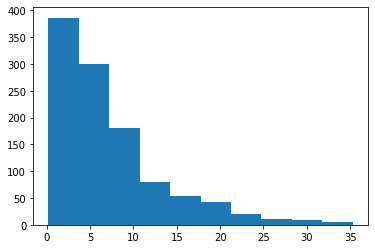

In [ ]:
plt.hist(df["Experience"])
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


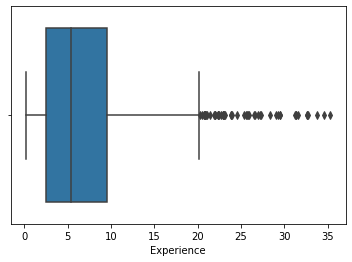

In [ ]:
sns.boxplot(df["Experience"])
plt.show()

In [ ]:
df.shape

(1085, 13)

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

X = preprocessor.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
X_train.shape, y_train.shape

((813, 28), (813,))

##Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)
print("Accuracy of Logistic Regression Model : {}%".format(round(accuracy_score(y_pred, y_test)*100)))
print("Classification Report of Logistic Regression Model : \n",classification_report(y_pred, y_test))

Accuracy of Logistic Regression Model : 93%
Classification Report of Logistic Regression Model : 
               precision    recall  f1-score   support

           0       1.00      0.93      0.96       270
           1       0.10      1.00      0.17         2

    accuracy                           0.93       272
   macro avg       0.55      0.96      0.57       272
weighted avg       0.99      0.93      0.96       272



####Hyper Parameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
parameter = {"penalty":["l1", "l2", "elasticnet"],
             "C" : [1,2,3,4,5,6,10,20,40,50],
             "max_iter" : [100,200,300,400,500]}
Classfier_Reg = GridSearchCV(log_reg,param_grid=parameter, scoring="accuracy", cv=10)

In [ ]:
Classfier_Reg.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 40, 50],
                         'max_iter': [100, 200, 300, 400, 500],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [ ]:
print(Classfier_Reg.best_params_)

{'C': 20, 'max_iter': 100, 'penalty': 'l2'}


In [ ]:
print(Classfier_Reg.best_score_)

0.9065492321589883


In [ ]:
y_pred_tune_grid = Classfier_Reg.predict(X_test)

In [ ]:
accuracy_score(y_pred_tune_grid, y_test)*100

93.75

In [ ]:
print(classification_report(y_pred_tune_grid, y_test))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       268
           1       0.19      1.00      0.32         4

    accuracy                           0.94       272
   macro avg       0.60      0.97      0.64       272
weighted avg       0.99      0.94      0.96       272



In [ ]:
log_reg_tune = LogisticRegression(penalty="l2",C = 4, max_iter=100)
log_reg_tune.fit(X_train,y_train)
y_pred_tune = log_reg_tune.predict(X_test)
print("Accuracy of Logistic Regression Model : {}%".format(round(accuracy_score(y_pred_tune, y_test)*100)))
print("Classification Report of Logistic Regression Model : \n",classification_report(y_pred_tune, y_test))

Accuracy of Logistic Regression Model : 94%
Classification Report of Logistic Regression Model : 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97       268
           1       0.19      1.00      0.32         4

    accuracy                           0.94       272
   macro avg       0.60      0.97      0.64       272
weighted avg       0.99      0.94      0.96       272



##Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train,y_train)
y_pred_dec = dec_tree.predict(X_test)
accuracy_score(y_pred_dec, y_test)*100

87.13235294117648

In [ ]:
# from sklearn import tree
# tree.plot_tree(dec_tree)

In [ ]:
from sklearn.model_selection import GridSearchCV
parameter_dtc = {"criterion" : ["gini", "entropy", "log_loss"],
                 "splitter" : ["best", "random"],
                 "max_depth" : [1,2,3,4,5],
                 "max_features" : ["auto", "sqrt", "log2"],
                 "ccp_alpha" : [1,2,3,4,5,6,7]}
Classfier_dtc = GridSearchCV(dec_tree,param_grid=parameter_dtc, scoring="accuracy", cv=5)

In [ ]:
Classfier_dtc.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [1, 2, 3, 4, 5, 6, 7],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
print(Classfier_dtc.best_params_)

{'ccp_alpha': 1, 'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'splitter': 'best'}


In [ ]:
print(Classfier_dtc.best_score_)

0.9065212451715519


In [ ]:
y_pred_tune_dtc = Classfier_dtc.predict(X_test)

In [ ]:
accuracy_score(y_pred_tune_dtc, y_test)*100

92.27941176470588

In [ ]:
print(classification_report(y_pred_tune_dtc, y_test))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96       272
           1       0.00      0.00      0.00         0

    accuracy                           0.92       272
   macro avg       0.50      0.46      0.48       272
weighted avg       1.00      0.92      0.96       272



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
accuracy_score(y_pred_knn, y_test)*100

91.54411764705883

In [ ]:
from sklearn.model_selection import GridSearchCV
parameter_knn = {"n_neighbors" : list(np.arange(1,30,1)),
                 "weights" : ["uniform", "distance"],
                 "algorithm" : ["auto", "ball_tree", "kd_tree", "brute"]}
Classfier_knn = GridSearchCV(knn,param_grid=parameter_knn, scoring="accuracy", cv=5)

In [ ]:
Classfier_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
print(Classfier_knn.best_params_)

{'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'uniform'}


In [ ]:
print(Classfier_knn.best_score_)

0.9065212451715519


In [ ]:
y_pred_tune_knn = Classfier_knn.predict(X_test)

In [ ]:
accuracy_score(y_pred_tune_knn, y_test)*100

92.27941176470588

In [ ]:
print(classification_report(y_pred_tune_knn, y_test))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96       272
           1       0.00      0.00      0.00         0

    accuracy                           0.92       272
   macro avg       0.50      0.46      0.48       272
weighted avg       1.00      0.92      0.96       272



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train,y_train)
y_pred_rfc = random_forest.predict(X_test)
accuracy_score(y_pred_rfc, y_test)*100

91.54411764705883

In [ ]:
from sklearn.model_selection import GridSearchCV
parameter_rfc = {"n_estimators" : list(np.arange(10,15,1)),
                 "criterion" : ["gini", "entropy", "log_loss"],
                 "max_depth" : list(np.arange(0,14))}
Classfier_rfc = GridSearchCV(random_forest,param_grid=parameter_rfc, scoring="accuracy", cv=5)

In [ ]:
Classfier_rfc.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
75 fits failed out of a total of 1050.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 581, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.9/dist-packages/sklearn/utils/_p

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13],
                         'n_estimators': [10, 11, 12, 13, 14]},
             scoring='accuracy')

In [ ]:
print(Classfier_rfc.best_params_)

{'criterion': 'log_loss', 'max_depth': 4, 'n_estimators': 12}


In [ ]:
print(Classfier_rfc.best_score_)

0.9089752329016132


In [ ]:
y_pred_tune_rfc = Classfier_rfc.predict(X_test)

In [ ]:
accuracy_score(y_pred_tune_rfc, y_test)*100

92.27941176470588

In [ ]:
print(classification_report(y_pred_tune_rfc, y_test))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96       272
           1       0.00      0.00      0.00         0

    accuracy                           0.92       272
   macro avg       0.50      0.46      0.48       272
weighted avg       1.00      0.92      0.96       272



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##XGBoost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
grad_boost = GradientBoostingClassifier()
grad_boost.fit(X_train,y_train)
y_pred_gbc = grad_boost.predict(X_test)
accuracy_score(y_pred_gbc, y_test)*100

91.54411764705883

##SVM

In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,y_train)
y_pred_svm = svm.predict(X_test)
accuracy_score(y_pred_svm, y_test)*100

92.27941176470588

In [ ]:
from sklearn.model_selection import GridSearchCV
parameter_svm = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'poly', 'sigmoid']}
Classfier_svm = GridSearchCV(svm,param_grid=parameter_svm,refit=True, verbose=2)

In [ ]:
Classfier_svm.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [ ]:
print(Classfier_svm.best_params_)

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


In [ ]:
print(Classfier_svm.best_estimator_)

SVC(C=1000, gamma=0.001)


In [ ]:
print(Classfier_svm.best_score_)

0.910202226766644


In [ ]:
y_pred_tune_svm = Classfier_svm.predict(X_test)

In [ ]:
accuracy_score(y_pred_tune_svm, y_test)*100

93.75

In [ ]:
print(classification_report(y_pred_tune_svm, y_test))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       268
           1       0.19      1.00      0.32         4

    accuracy                           0.94       272
   macro avg       0.60      0.97      0.64       272
weighted avg       0.99      0.94      0.96       272

